In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Spline:
    def __init__(self, x, y, a, b, c, d):
        self.x = x
        self.y = y
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def value(self, z):
        i = self.__find_segment(z)
        dx = z - self.x[i]
        return self.a[i] + self.b[i]*dx + self.c[i]*dx**2 + self.d[i]*dx**3

    def plot(self):
        #Plots spline
        colors = ['red', 'blue']
        for i in range(len(self.x) - 1):
            xs = np.linspace(self.x[i], self.x[i+1], num=50)
            ys = [self.value(x) for x in xs]
            plt.plot(xs, ys, color=colors[i%2])
        plt.show()

    def __find_segment(self, z: float):
        # Find the segment containing z
        n = len(self.x) - 1
        if z < self.x[0] or z > self.x[n]:
            raise ValueError("z is outside the interpolation range.")
        i = 0
        while i < n and z > self.x[i+1]:
            i += 1
        return i


In [2]:
def interpolate(x, y):
    #Interpolates between points given in arrays x, y, returns Spline object
    n = len(x)
    if n != len(y):
        raise ValueError("The lengths of x and y must be the same.")

        
    h = np.zeros(n)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
    
    a = np.copy(y)
    
    c = np.zeros(n)
    right = np.zeros(n)
    below = np.zeros(n)
    diagonal = np.zeros(n)
    above = np.zeros(n)
    
    for i in range(1, n-1):
        below[i] = h[i-1]
        diagonal[i] = 2*(h[i-1]+h[i])
        above[i] = h[i+1]
        right[i] = (3/h[i])*(a[i+1]-a[i]) - (3/h[i-1])*(a[i]-a[i-1])
        
    diagonal[0] = 1
    diagonal[n-1] = 1
    
    for i in range(1,n):
        w = below[i] / diagonal[i-1]
        diagonal[i] = diagonal[i] - w * above[i-1]
        right[i] = right[i] - w * right[i-1]
        
    c[n-1] = right[n-1] / diagonal[n-1]
    
    for i in range(n-2, -1, -1):
        c[i] = (right[i] - above[0] * c[i+1]) / diagonal[i]
    
    b = np.zeros(n-1)
    for i in range(n-1):
        b[i] = (1 / h[i]) * (a[i+1] - a[i]) - (h[i] / 3) * (2 * c[i] + c[i+1])
    
    d = np.zeros(n-1)
    for i in range(n-1):
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
    
    a = a[0:n-1]
    c = c[0:n-1]
    return Spline(x, y, a, b, c, d)


64.00000000000001


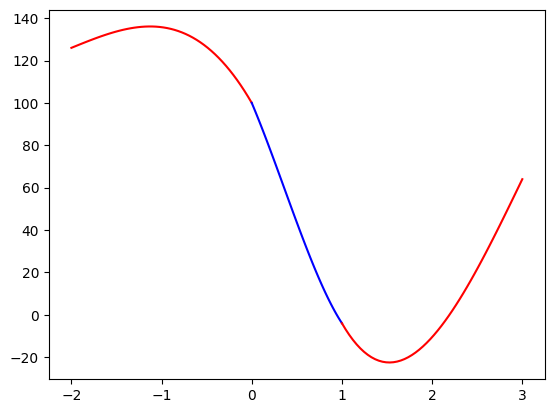

In [3]:
x = [-2.0, 0.0, 1.0, 3.0]
y = [126.0, 100.0, -4.0, 64.0]

#Interpolates between given x and y
spline = interpolate(x, y)
#Spline value at 3
print(spline.value(3))
# Plot the spline
spline.plot()

In [6]:
from scipy.interpolate import CubicSpline
spline = CubicSpline(x,y)
#Comparison with scipy implementation
print(spline(3))

64.0


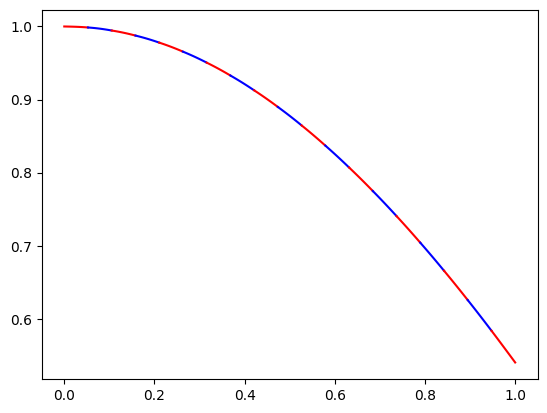

In [73]:
x = np.linspace(0, 1, 20)
y = np.cos(x)

S = interpolate(x, y)
S.plot()